In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
df = pd.read_csv("01. Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [4]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [7]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


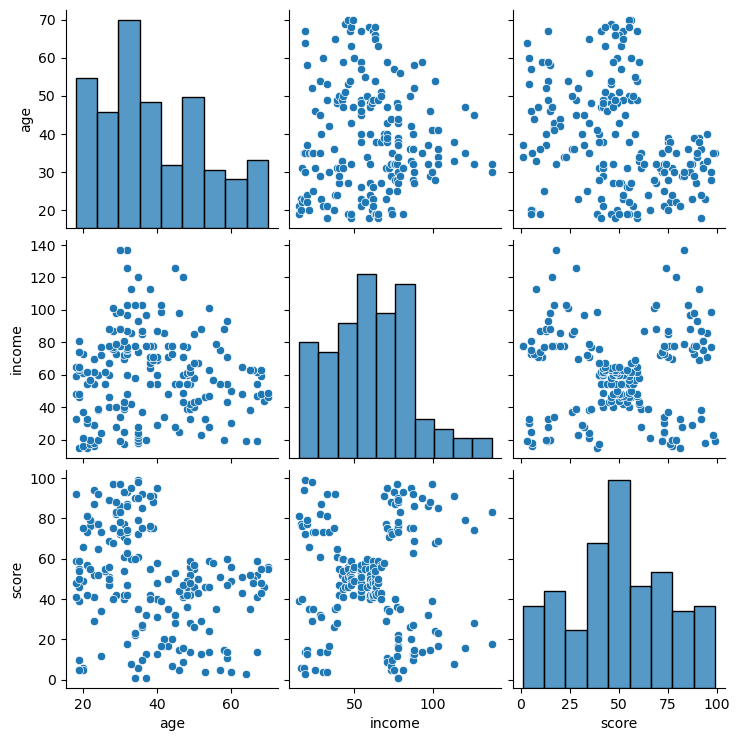

In [8]:
seaborn.pairplot(df[['age','income','score']])

In [9]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(df[['score','income']])

In [10]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ]])

In [11]:
df['income_clusters'] = kmeans.labels_

In [12]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


In [13]:
df['income_clusters'].value_counts()

0    81
2    39
4    35
1    23
3    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='score', ylabel='income'>

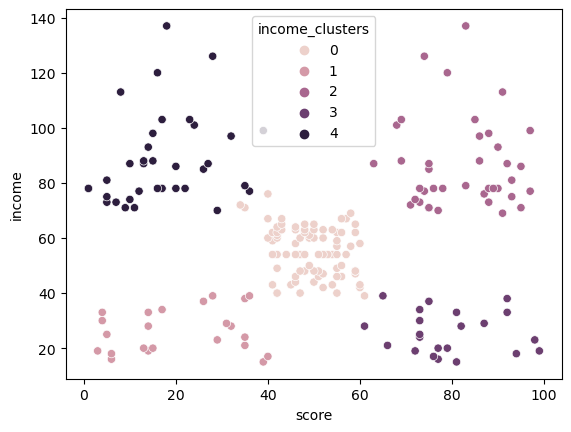

In [14]:
seaborn.scatterplot(x='score',y='income',hue='income_clusters',data=df)

In [15]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans = kmeans.fit(df[['age','score']])

In [16]:
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [17]:
df['age_cluster'] = kmeans.labels_

In [18]:
df['age_cluster'].value_counts()

0    115
1     85
Name: age_cluster, dtype: int64

In [19]:
df

,CustomerID,gender,age,income,score,income_clusters,age_cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,4,0
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,4,0


<AxesSubplot:xlabel='age', ylabel='income'>

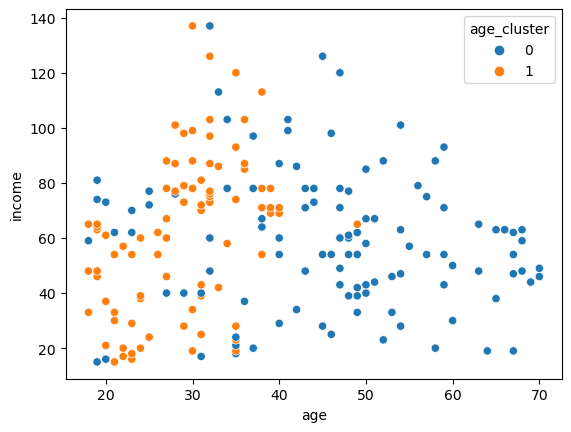

In [20]:
seaborn.scatterplot(x='age',y='income',hue='age_cluster',data=df)